In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import tof2eBE, jacobian, calibrate

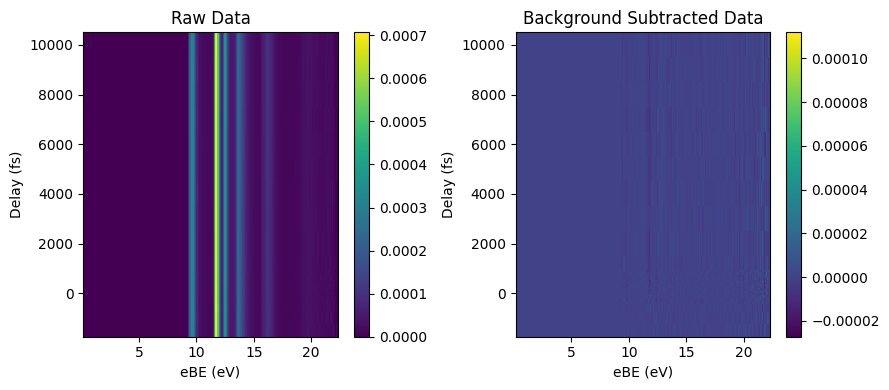

In [2]:
data_path = "processed_data/run_275_processed_jac.txt"
data = np.genfromtxt(data_path)

x = data[0,1:]
y = data[1:,0]
z = data[1:,1:]

def bkg_sub(z, lb, ub):
    bkg = np.mean(z[lb:ub,:],axis=0)
    z = z - bkg
    return z

bkg_window = [-1500,-300]
bkg_index = [np.argmin(np.abs(y - b)) for b in bkg_window]

z_sub = bkg_sub(z, *bkg_index)

fig,axs = plt.subplots(1,2, figsize = (9,4))

img = axs[0].pcolormesh(x,y,z)
axs[0].set_title("Raw Data")
img2 = axs[1].pcolormesh(x,y,z_sub)
axs[1].set_title("Background Subtracted Data")

for ax in axs:
    ax.set_xlabel('eBE (eV)')
    ax.set_ylabel('Delay (fs)')
    # ax.set_xlim(3580,3700)
    
fig.colorbar(img)
fig.colorbar(img2)

plt.tight_layout()



# Kinetic traces

plot multiple kinetic traces for specific energy windows

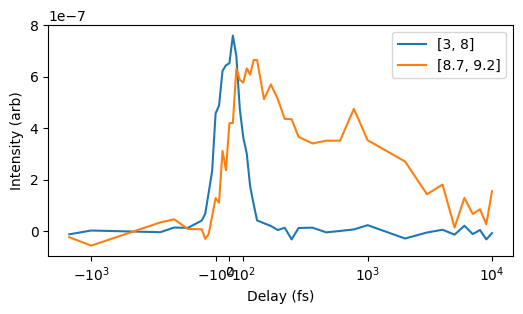

In [3]:
#set tof range
tof_windows = [[3,8],[8.7,9.2]]
fig,ax=plt.subplots(figsize = (6,3))

for tof_window in tof_windows:
    tof_index = [np.argmin(np.abs(x - b)) for b in tof_window]

    spec = np.sum(z_sub[:,tof_index[0]:tof_index[1]],axis=1)


    ax.plot(y,spec, label = str(tof_window))

ax.set_xscale('symlog', linthresh = 1000)
ax.set_xlabel('Delay (fs)')
ax.set_ylabel('Intensity (arb)')
ax.legend()








# Time-dependent spectra

plot multiple energy spectra at specific delay windows 

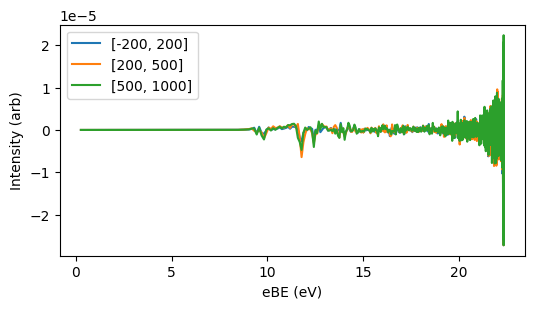

In [4]:
delay_windows = [[-200,200],[200,500],[500,1000]]
fig,ax=plt.subplots(figsize = (6,3))

for delay_window in delay_windows:
    delay_index = [np.argmin(np.abs(y - b)) for b in delay_window]

    spec = np.mean(z_sub[delay_index[0]:delay_index[1]],axis=0)


    ax.plot(x,spec, label = str(delay_window))

ax.set_xlabel('eBE (eV)')
ax.set_ylabel('Intensity (arb)')
# ax.set_xlim(3580,3620)
# ax.set_ylim(-50,50)
ax.legend()